In [1]:
# Import libraries 
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import glob 
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os
import sys
import warnings
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
print("hi")

hi


In [2]:
#for dirname, _, filenames in os.walk:
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

TESS="C:/Users/ketaki/Desktop/datasets/TESS/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/"
RAV="C:/Users/ketaki/Desktop/datasets/RAVDESS/audio_speech_actors_01-24/"
SAVEE="C:/Users/ketaki/Desktop/datasets/SAVEE/ALL/"
CREMA="C:/Users/ketaki/Desktop/datasets/CREMA/AudioWAV/"

# Run one example 
dir_list = os.listdir(TESS)
dir_list[0:5]

['OAF_angry', 'OAF_disgust', 'OAF_Fear', 'OAF_happy', 'OAF_neutral']

In [3]:
# Get the data location for SAVEE
dir_list = os.listdir(SAVEE)

# parse the filename to get the emotions
emotion=[]
path = []
for i in dir_list:
    if i[-8:-6]=='_a':
        emotion.append('male_angry')
    elif i[-8:-6]=='_d':
        emotion.append('male_disgust')
    elif i[-8:-6]=='_f':
        emotion.append('male_fear')
    elif i[-8:-6]=='_h':
        emotion.append('male_happy')
    elif i[-8:-6]=='_n':
        emotion.append('male_neutral')
    elif i[-8:-6]=='sa':
        emotion.append('male_sad')
    elif i[-8:-6]=='su':
        emotion.append('male_surprise')
    else:
        emotion.append('male_error') 
    path.append(SAVEE + i)
    
# Now check out the label count distibution
SAVEE_df= pd.DataFrame(emotion, columns=['labels'])
SAVEE_df['source']='SAVEE'
SAVEE_df= pd.concat([SAVEE_df, pd.DataFrame(path, columns = ['path'])], axis=1)
SAVEE_df.labels.value_counts()

male_neutral     120
male_sad          60
male_disgust      60
male_fear         60
male_angry        60
male_surprise     60
male_happy        60
Name: labels, dtype: int64

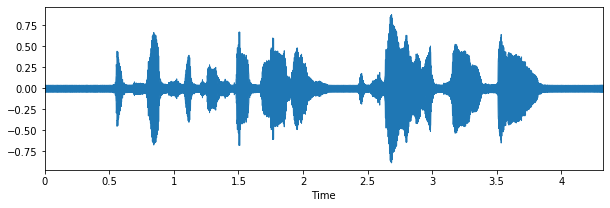

In [4]:
# use the Librosa library for this task
fname = SAVEE + 'DC_f11.wav'
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(10, 3))
librosa.display.waveplot(data, sr=sampling_rate)

# play the audio
ipd.Audio(fname)

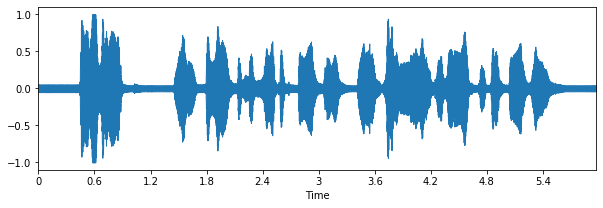

In [5]:
# let's play a happy track 
fname = SAVEE + 'DC_h11.wav'
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(10,3))
librosa.display.waveplot(data, sr=sampling_rate)

# let's play the audio
ipd.Audio(fname)

In [6]:
 # Now let us use the RAVDESS 
dir_list = os.listdir(RAV)
dir_list.sort()

emotion = []
gender = []
path = []
for i in dir_list:
    fname = os.listdir(RAV + i)
    for f in fname:
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        temp = int(part[6])
        if temp%2 == 0:
            temp = "female"
        else:
            temp = "male"
        gender.append(temp)
        path.append(RAV + i + '/' + f)
RAV_df = pd.DataFrame(emotion)
RAV_df = RAV_df.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
RAV_df = pd.concat([pd.DataFrame(gender),RAV_df],axis=1)
RAV_df.columns = ['gender','emotion']
RAV_df['labels'] =RAV_df.gender + '_' + RAV_df.emotion
RAV_df['source'] = 'RAVDESS'  
RAV_df = pd.concat([RAV_df,pd.DataFrame(path, columns = ['path'])],axis=1)
RAV_df = RAV_df.drop(['gender', 'emotion'], axis=1)
RAV_df.labels.value_counts()

male_neutral       144
female_neutral     144
male_sad            96
female_sad          96
male_disgust        96
male_angry          96
female_happy        96
male_happy          96
male_fear           96
female_surprise     96
male_surprise       96
female_fear         96
female_angry        96
female_disgust      96
Name: labels, dtype: int64

In [7]:
RAV_df.dtypes

labels    object
source    object
path      object
dtype: object

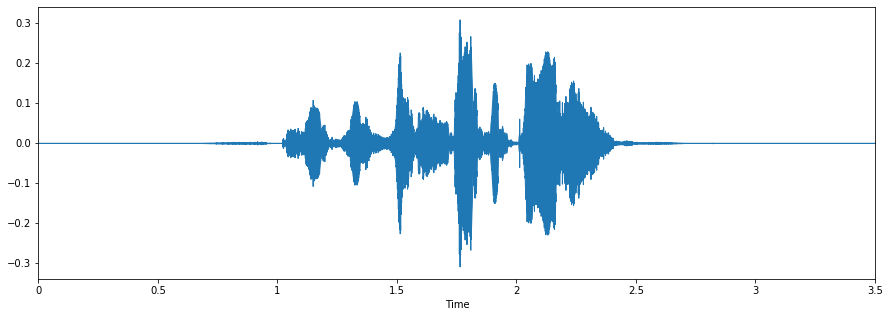

In [8]:
#Fearful audio
fname = RAV + 'Actor_14/03-01-06-02-02-01-14.wav'
data, sampling_rate = librosa.load(fname)
plt.figure(figsize= (15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

#play audio
ipd.Audio(fname)

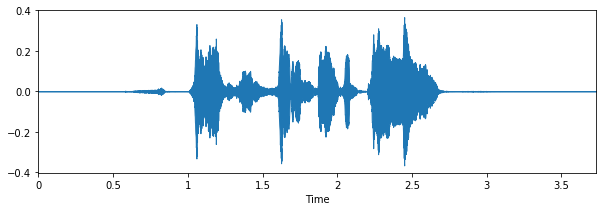

In [9]:
#Happy track 
fname = RAV + 'Actor_14/03-01-03-02-02-02-14.wav'
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(10,3))
librosa.display.waveplot(data, sr= sampling_rate)

#play audio
ipd.Audio(fname)

In [10]:
#TESS 
dir_list = os.listdir(TESS)
dir_list.sort()
dir_list

['OAF_Fear',
 'OAF_Pleasant_surprise',
 'OAF_Sad',
 'OAF_angry',
 'OAF_disgust',
 'OAF_happy',
 'OAF_neutral',
 'YAF_angry',
 'YAF_disgust',
 'YAF_fear',
 'YAF_happy',
 'YAF_neutral',
 'YAF_pleasant_surprised',
 'YAF_sad']

In [11]:
path = []
emotion = []

for i in dir_list:
    fname = os.listdir(TESS + i)
    for f in fname:
        if i == 'OAF_angry' or i == 'YAF_angry':
            emotion.append('female_angry')
        elif i == 'OAF_disgust' or i == 'YAF_disgust':
            emotion.append('female_disgust')
        elif i == 'OAF_Fear' or i == 'YAF_fear':
            emotion.append('female_fear')
        elif i == 'OAF_happy' or i == 'YAF_happy':
            emotion.append('female_happy')
        elif i == 'OAF_neutral' or i == 'YAF_neutral':
            emotion.append('female_neutral')
        elif i == 'OAF_Pleasant_suprise' or i == 'YAF_pleasant_surprise':
            emotion.append('female_surprise')
        elif i == 'OAF_Sad' or i == 'YAF_sad':
            emotion.append('female_sad')
        else:
            emotion.append('Unkown')
        path.append(TESS + i + "/" + f)
              

TESS_df = pd.DataFrame(emotion, columns = ['labels'])
TESS_df['source'] = 'TESS'
TESS_df = pd.concat([TESS_df, pd.DataFrame(path, columns = ['path'])], axis=1)
TESS_df.labels.value_counts()
   
            
            

female_sad        400
female_happy      400
female_neutral    400
Unkown            400
female_angry      400
female_disgust    400
female_fear       400
Name: labels, dtype: int64

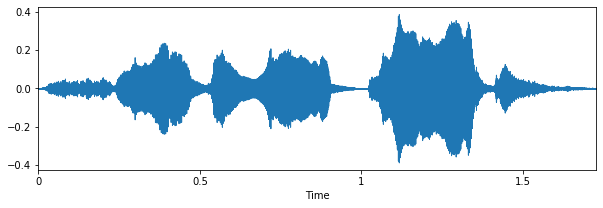

In [12]:
#Fearful track 
fname = TESS + 'YAF_fear/YAF_dog_fear.wav'

data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(10, 3))
librosa.display.waveplot(data, sr= sampling_rate)

#play audio
ipd.Audio(fname)

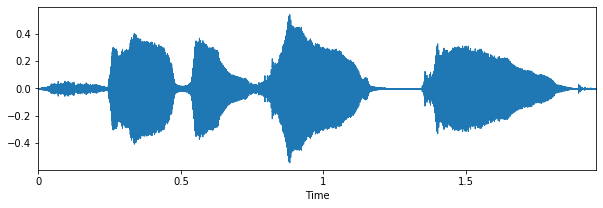

In [13]:
#happy track 
fname = TESS + 'YAF_happy/YAF_dog_happy.wav'

data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(10, 3))
librosa.display.waveplot(data, sr=sampling_rate)

#play audio
ipd.Audio(fname)

In [14]:
#CREDMA dataset
dir_list = os.listdir(CREMA)
dir_list.sort()
print(dir_list[0:10])

['1001_DFA_ANG_XX.wav', '1001_DFA_DIS_XX.wav', '1001_DFA_FEA_XX.wav', '1001_DFA_HAP_XX.wav', '1001_DFA_NEU_XX.wav', '1001_DFA_SAD_XX.wav', '1001_IEO_ANG_HI.wav', '1001_IEO_ANG_LO.wav', '1001_IEO_ANG_MD.wav', '1001_IEO_DIS_HI.wav']


In [15]:
gender = []
emotion = []
path = []
female = [1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,1024,1025,1028,1029,1030,1037,1043,1046,1047,1049,
          1052,1053,1054,1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,1082,1084,1089,1091]
# print(dir_list[0].split('_'))
for i in dir_list: 
    part = i.split('_')
    if int(part[0]) in female:
        temp = 'female'
    else:
        temp = 'male'
    gender.append(temp)
    if part[2] == 'SAD' and temp == 'male':
        emotion.append('male_sad')
    elif part[2] == 'ANG' and temp == 'male':
        emotion.append('male_angry')
    elif part[2] == 'DIS' and temp == 'male':
        emotion.append('male_disgust')
    elif part[2] == 'FEA' and temp == 'male':
        emotion.append('male_fear')
    elif part[2] == 'HAP' and temp == 'male':
        emotion.append('male_happy')
    elif part[2] == 'NEU' and temp == 'male':
        emotion.append('male_neutral')
    elif part[2] == 'SAD' and temp == 'female':
        emotion.append('female_sad')
    elif part[2] == 'ANG' and temp == 'female':
        emotion.append('female_angry')
    elif part[2] == 'DIS' and temp == 'female':
        emotion.append('female_disgust')
    elif part[2] == 'FEA' and temp == 'female':
        emotion.append('female_fear')
    elif part[2] == 'HAP' and temp == 'female':
        emotion.append('female_happy')
    elif part[2] == 'NEU' and temp == 'female':
        emotion.append('female_neutral')
    else:
        emotion.append('Unknown')
    path.append(CREMA + i)
    
CREMA_df = pd.DataFrame(emotion, columns = ['labels'])
CREMA_df['source'] = 'CREMA'
CREMA_df = pd.concat([CREMA_df,pd.DataFrame(path, columns = ['path'])],axis=1)
CREMA_df.labels.value_counts()

male_sad          671
male_happy        671
male_fear         671
male_disgust      671
male_angry        671
female_disgust    600
female_sad        600
female_happy      600
female_angry      600
female_fear       600
male_neutral      575
female_neutral    512
Name: labels, dtype: int64

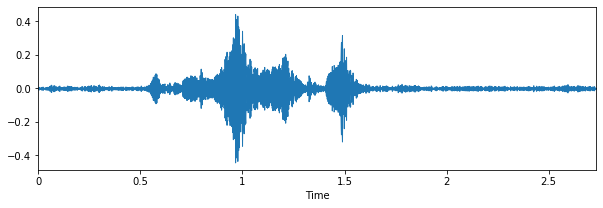

In [16]:
#use librosa lib for playing the track 
fname = CREMA + '1012_IEO_HAP_HI.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(10, 3))
librosa.display.waveplot(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

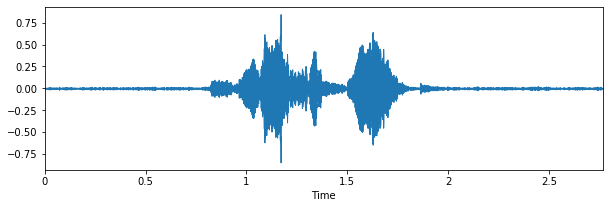

In [17]:
# A fearful track
fname = CREMA + '1012_IEO_FEA_HI.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(10, 3))
librosa.display.waveplot(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

In [18]:
TESS_df.tail()

labels source                                               path
2795  female_sad   TESS  C:/Users/ketaki/Desktop/datasets/TESS/TESS Tor...
2796  female_sad   TESS  C:/Users/ketaki/Desktop/datasets/TESS/TESS Tor...
2797  female_sad   TESS  C:/Users/ketaki/Desktop/datasets/TESS/TESS Tor...
2798  female_sad   TESS  C:/Users/ketaki/Desktop/datasets/TESS/TESS Tor...
2799  female_sad   TESS  C:/Users/ketaki/Desktop/datasets/TESS/TESS Tor...

In [19]:
#Combining the 4 datasets 
df = pd.concat([SAVEE_df, RAV_df, TESS_df, CREMA_df], axis=0)
print(df.labels.value_counts())
df.head()
df.to_csv("Data_path.csv", index= False)

female_angry       1096
female_disgust     1096
female_sad         1096
female_happy       1096
female_fear        1096
female_neutral     1056
male_neutral        839
male_sad            827
male_angry          827
male_happy          827
male_fear           827
male_disgust        827
Unkown              400
male_surprise       156
female_surprise      96
Name: labels, dtype: int64


In [20]:
#Feature Extraction
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
import pandas as pd
import os
import IPython.display as ipd

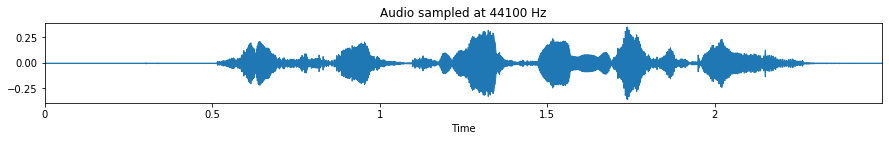

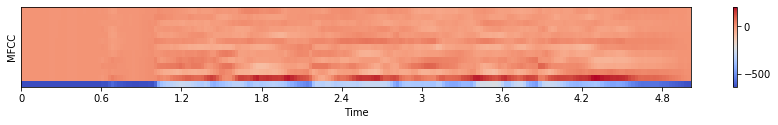

In [21]:
# source : RAVDESS, Gender: Female, Emotion: Angry
path = "C:/Users/ketaki/Desktop/datasets/RAVDESS/audio_speech_actors_01-24/Actor_08/03-01-05-02-01-01-08.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast', duration=2.5, sr= 22050*2, offset=0.5)
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# audio wave
plt.figure(figsize=(15,5))
plt.subplot(3,1,1)
librosa.display.waveplot(X, sr=sample_rate)
plt.title('Audio sampled at 44100 Hz')

# MFCC 
plt.figure(figsize=(15, 5))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

#play audio
ipd.Audio(path)

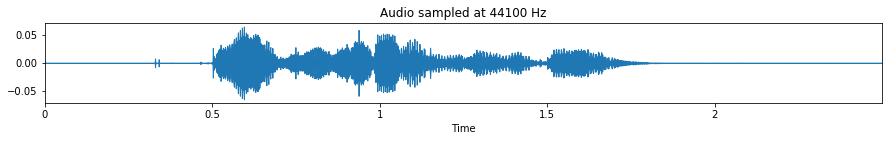

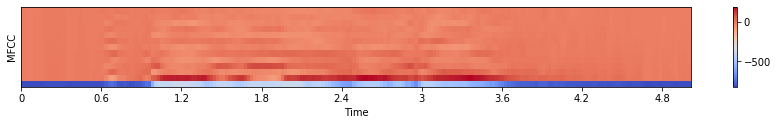

In [22]:
#source: RAVDESS, gender: Male, emotion: Happy 
path = "C:/Users/ketaki/Desktop/datasets/RAVDESS/audio_speech_actors_01-24/Actor_11/03-01-03-01-02-02-11.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast', duration=2.5, sr=22050*2, offset=0.5)
mfcc= librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

#audio wave
plt.figure(figsize=(15,5))
plt.subplot(3,1,1)
librosa.display.waveplot(X, sr=sample_rate)
plt.title('Audio sampled at 44100 Hz')

#MFCC
plt.figure(figsize=(15,5))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path)

108
108


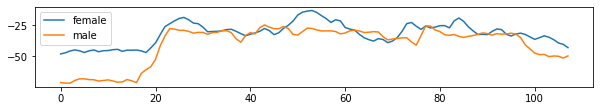

In [23]:
#source: RAVDESS, Gender: Female, Emotion:Angry 
path = "C:/Users/ketaki/Desktop/datasets/RAVDESS/audio_speech_actors_01-24/Actor_08/03-01-05-02-01-01-08.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast', duration=2.5, sr=22050, offset=0.5)
female= librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
female = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(female))

#source: RAVDESS, Gender: Male, Emotion:Angry 
path = "C:/Users/ketaki/Desktop/datasets/RAVDESS/audio_speech_actors_01-24/Actor_09/03-01-05-01-01-01-09.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast', duration=2.5, sr=22050, offset=0.5)
male= librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
male= np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(male))

#audio wave
plt.figure(figsize=(10,5))
plt.subplot(3,1,1)
plt.plot(female, label='female')
plt.plot(male, label='male')
plt.legend()

In [24]:
#Data preperation and preprocessing

#importing libraries
import keras
from keras import regularizers
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

#sklearn
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier # multi-layer perceptron model

import librosa
import librosa.display
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import seaborn as sns
import glob
import os
import pickle
import IPython.display as ipd

Using TensorFlow backend.


In [25]:
ref= pd.read_csv("C:/Users/ketaki/Data_path.csv")
ref

labels source  \
0          male_angry  SAVEE   
1          male_angry  SAVEE   
2          male_angry  SAVEE   
3          male_angry  SAVEE   
4          male_angry  SAVEE   
...               ...    ...   
12157  female_disgust  CREMA   
12158     female_fear  CREMA   
12159    female_happy  CREMA   
12160  female_neutral  CREMA   
12161      female_sad  CREMA   

                                                    path  
0      C:/Users/ketaki/Desktop/datasets/SAVEE/ALL/DC_...  
1      C:/Users/ketaki/Desktop/datasets/SAVEE/ALL/DC_...  
2      C:/Users/ketaki/Desktop/datasets/SAVEE/ALL/DC_...  
3      C:/Users/ketaki/Desktop/datasets/SAVEE/ALL/DC_...  
4      C:/Users/ketaki/Desktop/datasets/SAVEE/ALL/DC_...  
...                                                  ...  
12157  C:/Users/ketaki/Desktop/datasets/CREMA/AudioWA...  
12158  C:/Users/ketaki/Desktop/datasets/CREMA/AudioWA...  
12159  C:/Users/ketaki/Desktop/datasets/CREMA/AudioWA...  
12160  C:/Users/ketaki/Desktop/datasets/CREMA/AudioWA...  
12161  C:/Users/ketaki/Desktop/datasets/CREMA/AudioWA...  

[12162 rows x 3 columns]

In [26]:
ref.path[2319]

'C:/Users/ketaki/Desktop/datasets/TESS/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_youth_ps.wav'

In [27]:
#
df = pd.DataFrame(columns=['feature'])

#loop extraction over the entire dataset
counter = 0

for index, path in enumerate (ref.path):
    try:
        X, sample_rate= librosa.load(path, res_type='kaiser_fast', duration=2.5, sr=44100, offset=0.5)
        sample_rate= np.array(sample_rate)

        #mean as the feature. could do min/max as well
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
        df.loc[counter] = [mfccs]
        counter = counter + 1

        print(len(df))
        df.head()
    except TypeError:
        
        print(index, path)
        

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060


3501
3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700


5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341


8420
8421
8422
8423
8424
8425
8426
8427
8428
8429
8430
8431
8432
8433
8434
8435
8436
8437
8438
8439
8440
8441
8442
8443
8444
8445
8446
8447
8448
8449
8450
8451
8452
8453
8454
8455
8456
8457
8458
8459
8460
8461
8462
8463
8464
8465
8466
8467
8468
8469
8470
8471
8472
8473
8474
8475
8476
8477
8478
8479
8480
8481
8482
8483
8484
8485
8486
8487
8488
8489
8490
8491
8492
8493
8494
8495
8496
8497
8498
8499
8500
8501
8502
8503
8504
8505
8506
8507
8508
8509
8510
8511
8512
8513
8514
8515
8516
8517
8518
8519
8520
8521
8522
8523
8524
8525
8526
8527
8528
8529
8530
8531
8532
8533
8534
8535
8536
8537
8538
8539
8540
8541
8542
8543
8544
8545
8546
8547
8548
8549
8550
8551
8552
8553
8554
8555
8556
8557
8558
8559
8560
8561
8562
8563
8564
8565
8566
8567
8568
8569
8570
8571
8572
8573
8574
8575
8576
8577
8578
8579
8580
8581
8582
8583
8584
8585
8586
8587
8588
8589
8590
8591
8592
8593
8594
8595
8596
8597
8598
8599
8600
8601
8602
8603
8604
8605
8606
8607
8608
8609
8610
8611
8612
8613
8614
8615
8616
8617
8618
8619


10050
10051
10052
10053
10054
10055
10056
10057
10058
10059
10060
10061
10062
10063
10064
10065
10066
10067
10068
10069
10070
10071
10072
10073
10074
10075
10076
10077
10078
10079
10080
10081
10082
10083
10084
10085
10086
10087
10088
10089
10090
10091
10092
10093
10094
10095
10096
10097
10098
10099
10100
10101
10102
10103
10104
10105
10106
10107
10108
10109
10110
10111
10112
10113
10114
10115
10116
10117
10118
10119
10120
10121
10122
10123
10124
10125
10126
10127
10128
10129
10130
10131
10132
10133
10134
10135
10136
10137
10138
10139
10140
10141
10142
10143
10144
10145
10146
10147
10148
10149
10150
10151
10152
10153
10154
10155
10156
10157
10158
10159
10160
10161
10162
10163
10164
10165
10166
10167
10168
10169
10170
10171
10172
10173
10174
10175
10176
10177
10178
10179
10180
10181
10182
10183
10184
10185
10186
10187
10188
10189
10190
10191
10192
10193
10194
10195
10196
10197
10198
10199
10200
10201
10202
10203
10204
10205
10206
10207
10208
10209
10210
10211
10212
10213
10214
10215
1021

11418
11419
11420
11421
11422
11423
11424
11425
11426
11427
11428
11429
11430
11431
11432
11433
11434
11435
11436
11437
11438
11439
11440
11441
11442
11443
11444
11445
11446
11447
11448
11449
11450
11451
11452
11453
11454
11455
11456
11457
11458
11459
11460
11461
11462
11463
11464
11465
11466
11467
11468
11469
11470
11471
11472
11473
11474
11475
11476
11477
11478
11479
11480
11481
11482
11483
11484
11485
11486
11487
11488
11489
11490
11491
11492
11493
11494
11495
11496
11497
11498
11499
11500
11501
11502
11503
11504
11505
11506
11507
11508
11509
11510
11511
11512
11513
11514
11515
11516
11517
11518
11519
11520
11521
11522
11523
11524
11525
11526
11527
11528
11529
11530
11531
11532
11533
11534
11535
11536
11537
11538
11539
11540
11541
11542
11543
11544
11545
11546
11547
11548
11549
11550
11551
11552
11553
11554
11555
11556
11557
11558
11559
11560
11561
11562
11563
11564
11565
11566
11567
11568
11569
11570
11571
11572
11573
11574
11575
11576
11577
11578
11579
11580
11581
11582
11583
1158

In [28]:
#Now extract the mean bands to its own feature columns
df = pd.concat([ref, pd.DataFrame(df['feature'].values.tolist())], axis=1)
df[:5]

labels source                                               path  \
0  male_angry  SAVEE  C:/Users/ketaki/Desktop/datasets/SAVEE/ALL/DC_...   
1  male_angry  SAVEE  C:/Users/ketaki/Desktop/datasets/SAVEE/ALL/DC_...   
2  male_angry  SAVEE  C:/Users/ketaki/Desktop/datasets/SAVEE/ALL/DC_...   
3  male_angry  SAVEE  C:/Users/ketaki/Desktop/datasets/SAVEE/ALL/DC_...   
4  male_angry  SAVEE  C:/Users/ketaki/Desktop/datasets/SAVEE/ALL/DC_...   

           0          1          2          3          4          5  \
0 -11.113933  -7.215755  -6.219190  -5.926543  -5.850419  -4.808960   
1 -24.449829 -22.465742 -22.928043 -23.243807 -22.926605 -23.432241   
2 -25.000114 -24.520256 -24.178183 -23.847450 -15.182783 -10.732485   
3  -1.529839  -4.333436 -12.285237 -13.083024 -12.041327 -11.819768   
4 -22.458632 -22.467834 -25.884357 -27.827044 -27.593534 -26.666508   

           6  ...        206        207        208        209        210  \
0  -2.513003  ...  -4.088852  -5.023864  -5.254714  -5.234094  -5.310308   
1 -14.830004  ... -22.627258 -22.633406 -22.511597 -24.300154 -24.496809   
2  -8.681472  ...        NaN        NaN        NaN        NaN        NaN   
3  -9.414148  ...        NaN        NaN        NaN        NaN        NaN   
4 -18.659023  ... -25.291666 -25.854906 -26.821354 -25.436455 -24.179941   

         211        212        213        214        215  
0  -5.621665  -6.072197  -6.611348  -2.509089   1.964608  
1 -22.895985 -23.511503 -24.342152 -24.530264 -25.457796  
2        NaN        NaN        NaN        NaN        NaN  
3        NaN        NaN        NaN        NaN        NaN  
4 -23.281618 -24.167494 -25.228062 -25.902941 -25.589962  

[5 rows x 219 columns]

In [29]:
#replace NA with 0
df = df.fillna(0)
print(df.shape)
df[:5]

(12162, 219)


labels source                                               path  \
0  male_angry  SAVEE  C:/Users/ketaki/Desktop/datasets/SAVEE/ALL/DC_...   
1  male_angry  SAVEE  C:/Users/ketaki/Desktop/datasets/SAVEE/ALL/DC_...   
2  male_angry  SAVEE  C:/Users/ketaki/Desktop/datasets/SAVEE/ALL/DC_...   
3  male_angry  SAVEE  C:/Users/ketaki/Desktop/datasets/SAVEE/ALL/DC_...   
4  male_angry  SAVEE  C:/Users/ketaki/Desktop/datasets/SAVEE/ALL/DC_...   

           0          1          2          3          4          5  \
0 -11.113933  -7.215755  -6.219190  -5.926543  -5.850419  -4.808960   
1 -24.449829 -22.465742 -22.928043 -23.243807 -22.926605 -23.432241   
2 -25.000114 -24.520256 -24.178183 -23.847450 -15.182783 -10.732485   
3  -1.529839  -4.333436 -12.285237 -13.083024 -12.041327 -11.819768   
4 -22.458632 -22.467834 -25.884357 -27.827044 -27.593534 -26.666508   

           6  ...        206        207        208        209        210  \
0  -2.513003  ...  -4.088852  -5.023864  -5.254714  -5.234094  -5.310308   
1 -14.830004  ... -22.627258 -22.633406 -22.511597 -24.300154 -24.496809   
2  -8.681472  ...   0.000000   0.000000   0.000000   0.000000   0.000000   
3  -9.414148  ...   0.000000   0.000000   0.000000   0.000000   0.000000   
4 -18.659023  ... -25.291666 -25.854906 -26.821354 -25.436455 -24.179941   

         211        212        213        214        215  
0  -5.621665  -6.072197  -6.611348  -2.509089   1.964608  
1 -22.895985 -23.511503 -24.342152 -24.530264 -25.457796  
2   0.000000   0.000000   0.000000   0.000000   0.000000  
3   0.000000   0.000000   0.000000   0.000000   0.000000  
4 -23.281618 -24.167494 -25.228062 -25.902941 -25.589962  

[5 rows x 219 columns]

In [30]:
# df.labels.unique()
df = df.drop(df[df.labels == 'Unkown'].index)

In [31]:
#Split between train and test data
X_train, X_test, y_train, y_test = train_test_split(df.drop(['path', 'labels', 'source'], 
                                                axis=1), df.labels, test_size=0.25,
                                                shuffle=True, random_state=42)
X_train[150:160]

0          1          2          3          4          5    \
6083  -18.096581 -17.410286 -19.424685 -17.878483 -16.794624 -17.574789   
6745  -14.327125 -13.479553 -14.470795 -14.273192 -14.282891 -14.123976   
625   -48.578926 -46.895561 -47.236275 -48.486771 -48.078396 -47.657047   
5377  -15.811890 -13.928855 -14.311159 -16.189213 -15.311469 -12.335378   
11224 -13.549081 -13.310986 -10.991011  -9.504719  -9.825991 -11.885777   
2388  -19.831562 -23.161694 -32.522781 -31.188225 -29.203861 -29.644022   
2377  -16.095680 -19.778017 -26.780949 -26.635151 -26.370319 -26.954100   
10238 -15.829025 -14.055522 -12.057423 -12.936815 -17.689747 -16.810711   
9821  -18.556572 -18.231384 -17.256643 -17.711485 -19.930931 -21.669970   
7500  -14.080924 -15.918626 -16.190157 -16.125340 -15.904765 -17.859522   

             6          7          8          9    ...        206        207  \
6083  -17.425266 -18.235239 -17.846321 -17.810093  ... -15.608355 -18.383770   
6745  -12.423570 -13.143371 -17.830650 -20.446785  ...   0.000000   0.000000   
625   -48.304131 -48.670181 -49.700497 -51.626358  ... -35.756771 -36.768124   
5377  -12.107862 -15.649790 -14.970138 -13.136097  ...   0.000000   0.000000   
11224 -13.360073 -11.883796 -11.823180 -12.943553  ...   0.000000   0.000000   
2388  -30.357454 -28.339764 -28.416609 -29.029854  ...   0.000000   0.000000   
2377  -27.663363 -28.357826 -29.040371 -27.161753  ...   0.000000   0.000000   
10238 -15.661839 -15.708099 -14.025086 -15.378013  ...   0.000000   0.000000   
9821  -20.859615 -18.109655 -18.423307 -20.301035  ...   0.000000   0.000000   
7500  -18.655903 -19.238997 -19.184731 -17.972687  ...   0.000000   0.000000   

             208        209        210        211        212        213  \
6083  -16.720140 -16.049818 -15.295462 -15.472724 -16.767286 -17.705437   
6745    0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
625   -36.884781 -37.734669 -38.832890 -41.131294 -41.172161 -43.698784   
5377    0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
11224   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
2388    0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
2377    0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
10238   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
9821    0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
7500    0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   

             214       215  
6083  -18.338331 -18.80938  
6745    0.000000   0.00000  
625   -45.843166 -46.04488  
5377    0.000000   0.00000  
11224   0.000000   0.00000  
2388    0.000000   0.00000  
2377    0.000000   0.00000  
10238   0.000000   0.00000  
9821    0.000000   0.00000  
7500    0.000000   0.00000  

[10 rows x 216 columns]

In [32]:
#Data normalization
mean = np.mean(X_train, axis=0)
std= np.std(X_train, axis=0)

X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

X_train[150:160]

0         1         2         3         4         5         6    \
6083   0.215312  0.306413  0.339861  0.446409  0.518343  0.457543  0.462525   
6745   0.474731  0.587792  0.702959  0.710067  0.701598  0.709299  0.826897   
625   -1.882522 -1.804269 -1.698601 -1.792001 -1.764107 -1.737124 -1.786991   
5377   0.372548  0.555629  0.714659  0.569947  0.626554  0.839787  0.849897   
11224  0.528277  0.599858  0.958011  1.058789  1.026772  0.872588  0.758673   
2388   0.095909 -0.105297 -0.620169 -0.526943 -0.387029 -0.422974 -0.479581   
2377   0.353017  0.136921 -0.199319 -0.193973 -0.180295 -0.226730 -0.283317   
10238  0.371368  0.546561  0.879848  0.807797  0.453036  0.513287  0.590990   
9821   0.183655  0.247635  0.498769  0.458622  0.289520  0.158777  0.212334   
7500   0.491675  0.413192  0.576938  0.574618  0.583267  0.436770  0.372874   

            7         8         9    ...       206       207       208  \
6083   0.398719  0.421520  0.420896  ... -0.403593 -0.584481 -0.480225   
6745   0.768975  0.422659  0.229190  ...  0.553113  0.538343  0.537891   
625   -1.814360 -1.894305 -2.037793  ... -1.638581 -1.707340 -1.708083   
5377   0.586720  0.630621  0.760730  ...  0.553113  0.538343  0.537891   
11224  0.860565  0.859407  0.774729  ...  0.553113  0.538343  0.537891   
2388  -0.336032 -0.346949 -0.394862  ...  0.553113  0.538343  0.537891   
2377  -0.337345 -0.392297 -0.259038  ...  0.553113  0.538343  0.537891   
10238  0.582480  0.699327  0.597726  ...  0.553113  0.538343  0.537891   
9821   0.407851  0.379573  0.239787  ...  0.553113  0.538343  0.537891   
7500   0.325731  0.324217  0.409075  ...  0.553113  0.538343  0.537891   

            209       210       211       212       213       214       215  
6083  -0.432787 -0.401520 -0.408217 -0.477775 -0.542565 -0.590207 -0.617755  
6745   0.538938  0.523867  0.524314  0.525118  0.513237  0.508171  0.503658  
625   -1.745681 -1.825551 -1.954643 -1.937493 -2.092587 -2.237615 -2.241531  
5377   0.538938  0.523867  0.524314  0.525118  0.513237  0.508171  0.503658  
11224  0.538938  0.523867  0.524314  0.525118  0.513237  0.508171  0.503658  
2388   0.538938  0.523867  0.524314  0.525118  0.513237  0.508171  0.503658  
2377   0.538938  0.523867  0.524314  0.525118  0.513237  0.508171  0.503658  
10238  0.538938  0.523867  0.524314  0.525118  0.513237  0.508171  0.503658  
9821   0.538938  0.523867  0.524314  0.525118  0.513237  0.508171  0.503658  
7500   0.538938  0.523867  0.524314  0.525118  0.513237  0.508171  0.503658  

[10 rows x 216 columns]

In [33]:
# Lets few preparation steps to get it into the correct format for Keras 
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# one hot encode the target 
lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

print(X_train.shape)
print(lb.classes_)
print(y_train[0:10])
print(y_test[0:10])

# Pickel the lb object for future use 
filename = 'labels'
outfile = open(filename,'wb')
pickle.dump(lb,outfile)
outfile.close()

(8821, 216)
['female_angry' 'female_disgust' 'female_fear' 'female_happy'
 'female_neutral' 'female_sad' 'female_surprise' 'male_angry'
 'male_disgust' 'male_fear' 'male_happy' 'male_neutral' 'male_sad'
 'male_surprise']
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0.

In [34]:
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
X_train.shape

#y_train.shape

(8821, 216, 1)

In [35]:
print(y_train.shape)
print(X_train.shape)
print(y_test.shape)

(8821, 14)
(8821, 216, 1)
(2941, 14)


In [36]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [37]:
#modelling
model = Sequential()
model.add(Conv1D(256, 8, padding='same', 
                 input_shape=(X_train.shape[1], 1)))  # X_train.shape[1] = No. of Columns
model.add(Activation('relu'))
model.add(Conv1D(256, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(14))
model.add(Activation('softmax'))
opt = keras.optimizers.SGD(lr=0.0001, momentum=0.0, 
                         decay=0.0, nesterov=False)
opt = keras.optimizers.Adam(0.0001)
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 216, 256)          2304      
_________________________________________________________________
activation_1 (Activation)    (None, 216, 256)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 216, 256)          524544    
_________________________________________________________________
batch_normalization_1 (Batch (None, 216, 256)          1024      
_________________________________________________________________
activation_2 (Activation)    (None, 216, 256)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 216, 256)          0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 27, 256)          

In [38]:
#CNN 
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
model_history=model.fit(X_train, y_train, batch_size=16, epochs=100, validation_data=(X_test, y_test))

Train on 8821 samples, validate on 2941 samples
Epoch 1/100
8821/8821 [==============================] - 152s 17ms/step - loss: 2.1311 - accuracy: 0.2487 - val_loss: 2.2700 - val_accuracy: 0.2333
Epoch 2/100
8821/8821 [==============================] - 157s 18ms/step - loss: 1.9269 - accuracy: 0.3229 - val_loss: 1.8468 - val_accuracy: 0.3563
Epoch 3/100
8821/8821 [==============================] - 152s 17ms/step - loss: 1.8252 - accuracy: 0.3522 - val_loss: 1.8121 - val_accuracy: 0.3798
Epoch 4/100
8821/8821 [==============================] - 159s 18ms/step - loss: 1.7609 - accuracy: 0.3810 - val_loss: 1.7814 - val_accuracy: 0.3706
Epoch 5/100
8821/8821 [==============================] - 160s 18ms/step - loss: 1.7146 - accuracy: 0.3912 - val_loss: 1.7371 - val_accuracy: 0.3856
Epoch 6/100
8821/8821 [==============================] - 154s 17ms/step - loss: 1.6691 - accuracy: 0.4082 - val_loss: 1.7270 - val_accuracy: 0.3914
Epoch 7/100
8821/8821 [==============================] - 157s 18

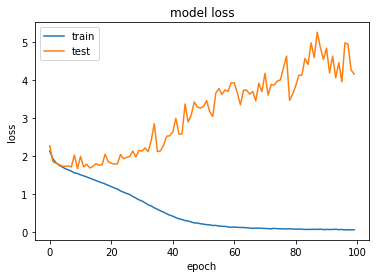

In [39]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [40]:
#save model and weights 
model_name = 'Emotion_model.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)

model_path = os.path.join(save_dir,model_name)
model.save(model_path)
print('Save model and weights at %s' %model_path)

#save the model to the disk 
model_json = model.to_json()
with open("model_json.json", "w") as json_file:
    json_file.write(model_json)

Save model and weights at C:\Users\ketaki\saved_models\Emotion_model.h5


In [41]:
#loading json and model architecture
json_file = open('model_json.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

#load weight into new model 
loaded_model.load_weights("saved_models/Emotion_Model.h5")
print("Loaded model from the disk")

#keras optimizer
opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score=loaded_model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" %(loaded_model.metrics_names[1], score[1]*100))

Loaded model from the disk
accuracy: 41.11%


In [42]:
preds = loaded_model.predict(X_test, batch_size=16, verbose=1)
preds = preds.argmax(axis=1)
preds

2941/2941 [==============================] - 13s 4ms/step


array([ 2, 10,  2, ...,  1,  0,  0], dtype=int64)

In [43]:
#predictions
preds = preds.astype(int).flatten()
preds = (lb.inverse_transform((preds)))
preds = pd.DataFrame({'predictedvalues':preds})

#Actual labels
actual = y_test.argmax(axis=1)
actual = actual.astype(int).flatten()
actual = (lb.inverse_transform((actual)))
actual = pd.DataFrame({'actualvalues':actual})

#Combining these two data frames
finaldf = actual.join(preds)
finaldf[170:180]

actualvalues predictedvalues
170    female_happy    female_happy
171     female_fear     female_fear
172       male_fear      male_happy
173       male_fear    female_angry
174    female_angry      female_sad
175    female_angry     female_fear
176    female_happy        male_sad
177     female_fear     female_fear
178  female_neutral  female_neutral
179    female_angry    female_happy

In [44]:
#write the predictions to the disk
finaldf.to_csv('Predictions.csv', index=False)
finaldf.groupby('predictedvalues').count()

actualvalues
predictedvalues              
female_angry              337
female_disgust            368
female_fear               357
female_happy              232
female_neutral            241
female_sad                316
female_surprise            29
male_angry                151
male_disgust              122
male_fear                 176
male_happy                181
male_neutral              197
male_sad                  215
male_surprise              19

In [45]:
#Emotion vs Gender Accuracy
def print_confusion_matrix(confusion_matrix, class_names, figsize=(10,7), fontsize=14):
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names)
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix must be integers")
        
        heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), 0, ha='right', fontsize=fontsize)
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        
#Gender recode function
def gender(row):
    if row == 'female_disgust' or 'female_fear' or 'female_happy' or 'female_sad' or 'female_surprise' or 'female_neutral':
        return 'female'
    elif row == 'male_angry' or 'male_fear' or 'male_happy' or 'male_sad' or 'male_surprise' or 'male_neutral' or 'male_disgust':
        return 'male'

0.4110846650799048


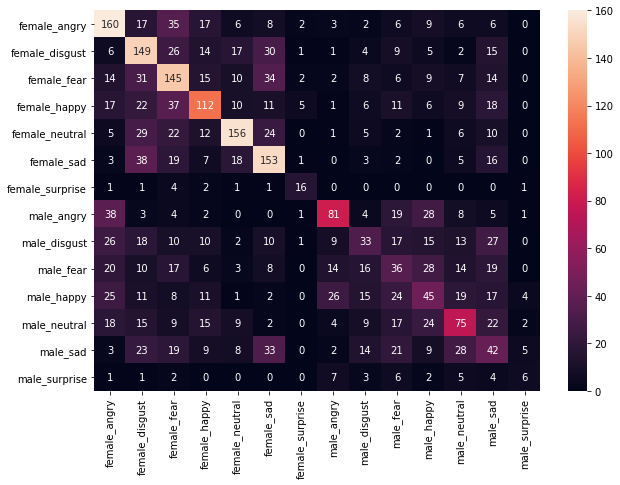

In [46]:
#Get the prediction file
finaldf = pd.read_csv('Predictions.csv')
classes = finaldf.actualvalues.unique()
classes.sort()

#Confusion matrix
c = confusion_matrix(finaldf.actualvalues, finaldf.predictedvalues)
print(accuracy_score(finaldf.actualvalues, finaldf.predictedvalues))
print_confusion_matrix(c, class_names=classes)

In [47]:
#Classification report 
classes = finaldf.actualvalues.unique()
classes.sort()
print(classification_report(finaldf.actualvalues, finaldf.predictedvalues, 
                           target_names=classes))

                 precision    recall  f1-score   support

   female_angry       0.47      0.58      0.52       277
 female_disgust       0.40      0.53      0.46       279
    female_fear       0.41      0.49      0.44       297
   female_happy       0.48      0.42      0.45       265
 female_neutral       0.65      0.57      0.61       273
     female_sad       0.48      0.58      0.53       265
female_surprise       0.55      0.59      0.57        27
     male_angry       0.54      0.42      0.47       194
   male_disgust       0.27      0.17      0.21       191
      male_fear       0.20      0.19      0.20       191
     male_happy       0.25      0.22      0.23       208
   male_neutral       0.38      0.34      0.36       221
       male_sad       0.20      0.19      0.19       216
  male_surprise       0.32      0.16      0.21        37

       accuracy                           0.41      2941
      macro avg       0.40      0.39      0.39      2941
   weighted avg       0.41   

In [48]:
finaldf[~(finaldf.actualvalues == finaldf.predictedvalues)]

actualvalues predictedvalues
1         male_fear      male_happy
3      female_happy  female_disgust
4       female_fear    female_happy
6        female_sad     female_fear
7        female_sad  female_neutral
...             ...             ...
2932     female_sad     female_fear
2933     male_happy    male_neutral
2936  male_surprise      male_angry
2937     male_happy    female_happy
2940   male_neutral    female_angry

[1732 rows x 2 columns]

0.7854471268276096


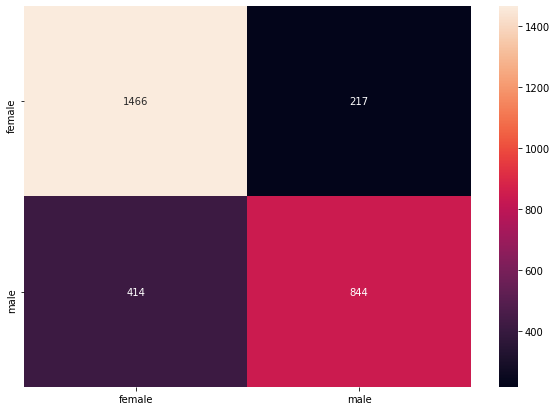

In [49]:
#Gender Accuracy
modidf = finaldf.copy()
modidf['actualvalues'] = finaldf.actualvalues.replace({'female_angry':'female', 'female_disgust':'female',
        'female_fear':'female', 'female_happy':'female', 'female_sad':'female', 'female_surprise':'female', 
                                                      'female_neutral':'female',
        'male_angry':'male', 'male_disgust':'male',
        'male_fear':'male', 'male_happy':'male', 'male_sad':'male', 'male_surprise':'male', 
                                                      'male_neutral':'male'})
modidf['predictedvalues'] = finaldf.predictedvalues.replace({'female_angry':'female', 'female_disgust':'female',
        'female_fear':'female', 'female_happy':'female', 'female_sad':'female', 'female_surprise':'female', 
                                                      'female_neutral':'female',
        'male_angry':'male', 'male_disgust':'male',
        'male_fear':'male', 'male_happy':'male', 'male_sad':'male', 'male_surprise':'male', 
                                                      'male_neutral':'male'})
classes = modidf.actualvalues.unique()
classes.sort()

#Confusion matrix
c = confusion_matrix(modidf.actualvalues, modidf.predictedvalues)
print(accuracy_score(modidf.actualvalues, modidf.predictedvalues))
print_confusion_matrix(c, class_names=classes)

In [50]:
#Classification report 
classes = modidf.actualvalues.unique()
classes.sort()
print(classification_report(modidf.actualvalues, modidf.predictedvalues, target_names=classes))

              precision    recall  f1-score   support

      female       0.78      0.87      0.82      1683
        male       0.80      0.67      0.73      1258

    accuracy                           0.79      2941
   macro avg       0.79      0.77      0.78      2941
weighted avg       0.79      0.79      0.78      2941



0.4682080924855491


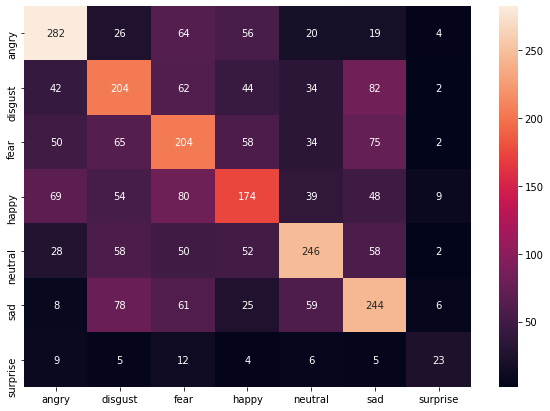

In [51]:
#Emotion accuracy
modidf = pd.read_csv("Predictions.csv")
modidf['actualvalues'] = modidf.actualvalues.replace({'female_angry':'angry', 'female_disgust':'disgust','female_fear':'fear',
                        'female_happy':'happy', 'female_sad':'sad', 'female_surprise':'surprise', 'female_neutral':'neutral', 
                                                    'male_angry':'angry', 'male_disgust':'disgust','male_fear':'fear',
                        'male_happy':'happy', 'male_sad':'sad', 'male_surprise':'surprise', 'male_neutral':'neutral'})

modidf['predictedvalues'] = modidf.predictedvalues.replace({'female_angry':'angry', 'female_disgust':'disgust','female_fear':'fear',
                        'female_happy':'happy', 'female_sad':'sad', 'female_surprise':'surprise', 'female_neutral':'neutral', 
                                                    'male_angry':'angry', 'male_disgust':'disgust','male_fear':'fear',
                        'male_happy':'happy', 'male_sad':'sad', 'male_surprise':'surprise', 'male_neutral':'neutral'})
classes = modidf.actualvalues.unique()
classes.sort()

#Confusion matrix
c = confusion_matrix(modidf.actualvalues, modidf.predictedvalues)
print(accuracy_score(modidf.actualvalues, modidf.predictedvalues))
print_confusion_matrix(c, class_names=classes)

In [52]:
#Classification report 
classes = modidf.actualvalues.unique()
classes.sort()
print(classification_report(modidf.actualvalues, modidf.predictedvalues, target_names=classes))

              precision    recall  f1-score   support

       angry       0.58      0.60      0.59       471
     disgust       0.42      0.43      0.42       470
        fear       0.38      0.42      0.40       488
       happy       0.42      0.37      0.39       473
     neutral       0.56      0.50      0.53       494
         sad       0.46      0.51      0.48       481
    surprise       0.48      0.36      0.41        64

    accuracy                           0.47      2941
   macro avg       0.47      0.45      0.46      2941
weighted avg       0.47      0.47      0.47      2941



In [53]:
#Testing the model on External Audio
from keras.models import Sequential, Model, model_from_json
import matplotlib.pyplot as plt
import keras
import pickle
import wave
import os
import pandas as pd
import numpy as np
import sys
import warnings 
import librosa
import librosa.display
import IPython.display as ipd 

#ignore warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [56]:
data, sampling_rate = librosa.load('C:/Users/ketaki/Downloads/heyy.wav')
ipd.Audio('C:/Users/ketaki/Downloads/heyy.wav')

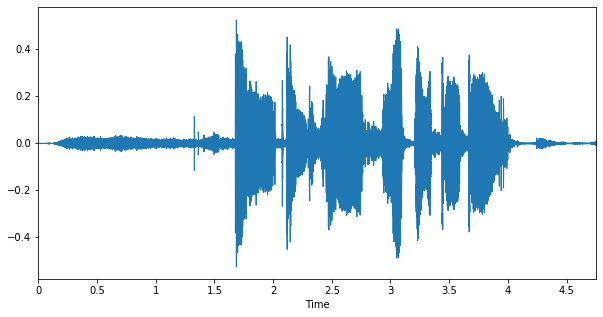

In [57]:
plt.figure(figsize=(10,5))
librosa.display.waveplot(data, sr=sampling_rate)

In [58]:
#loading json and model architecture
json_file = open('model_json.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

#load weights into the new model 
loaded_model.load_weights("saved_models/Emotion_Model.h5")
print("Loaded model from disk")

#keras optimizer 
opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

Loaded model from disk


In [60]:
#transform dataset for predictions
X, sample_rate = librosa.load('C:/Users/ketaki/Downloads/heyy.wav', res_type='kaiser_fast', duration=2.5, sr=44100, offset=0.5)
sample_rate = np.array(sample_rate)
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
newdf = pd.DataFrame(data=mfccs).T
newdf

0          1          2          3          4          5    \
0 -19.067289 -21.279934 -23.526888 -23.396881 -20.721882 -19.353062   

         6          7          8          9    ...        206        207  \
0 -20.655882 -21.264727 -20.840456 -23.068045  ... -18.304472 -18.647648   

         208        209        210        211       212        213       214  \
0 -16.532585 -15.101064 -12.149674 -11.719853 -11.40179 -10.972044 -4.567425   

        215  
0  2.110771  

[1 rows x 216 columns]

In [61]:
#Predictions
newdf = np.expand_dims(newdf, axis=2)
newpred = loaded_model.predict(newdf, batch_size=16, verbose=1)
newpred

1/1 [==============================] - 0s 148ms/step


array([[0.0000000e+00, 1.8568591e-20, 0.0000000e+00, 0.0000000e+00,
        4.2976370e-22, 0.0000000e+00, 3.4828880e-04, 3.9553072e-13,
        1.3055618e-05, 4.3063875e-28, 6.9074039e-16, 9.9919170e-01,
        4.4693879e-04, 8.0002287e-33]], dtype=float32)

In [62]:
import os
os.getcwd()

'C:\\Users\\ketaki'

In [65]:
filename = 'C:/Users/ketaki/Downloads/heyy.wav'
infile = open('labels', 'rb')
lb = pickle.load(infile)
infile.close()

#get the final prediction label
final = newpred.argmax(axis=1)
final = final.astype(int).flatten()
final = (lb.inverse_transform(final))
print(final)

['male_neutral']
